<a href="https://colab.research.google.com/github/Adam129511/sieci2/blob/main/mapy_ciep%C5%82a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%bash
rm -rf /content/*


In [2]:
import os
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [3]:
%%bash
pwd #funkcja drukująca katalog roboczy w którym się znajdujemy
wget --output-document=cats_and_dogs.zip --quiet https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/kaggle+/cats_and_dogs/dogs-vs-cats.zip #funckcja pobiera dane i zapisuje w pliku cats_and_dogs.zip
ls

/content
cats_and_dogs.zip


In [4]:
%%bash
unzip cats_and_dogs.zip

rm -rf sampleSubmission.csv

unzip -q train.zip -d /content/kaggle_original_data
rm -rf train.zip
cp /content/kaggle_original_data/train/* /content/kaggle_original_data/
rm -rf /content/kaggle_original_data/train
unzip -q /content/test1.zip



Archive:  cats_and_dogs.zip
  inflating: sampleSubmission.csv    
  inflating: train.zip               
  inflating: test1.zip               


In [5]:
%%bash


ls

cats_and_dogs.zip
kaggle_original_data
test1
test1.zip


In [6]:
def make_accuracy_plot(history):
     #Funkcja zwraca wykres dokładośći (accuracy) modelu na zbiorze treningowym i walidacyjnym
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    epochs = range(1, len(acc)+1)

    plt.figure(figsize = (10,8))
    plt.plot(epochs, acc, label = "dokładność trenowania", marker = 'o')
    plt.plot(epochs, val_acc, label = "dokładność walidacji", marker = 'o')
    plt.legend()
    plt.title('Dokładność trenowania i walidacji')
    plt.xlabel('epoki')
    plt.ylabel('Dokładność')
    plt.show()

def make_loss_plot(history): #Funkcja zwraca wykres straty (loss) na zbiorze treningowym i walidacyjnym
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    loss, val_loss = history.history['loss'], history.history['val_loss']
    epochs= range(1, len(loss)+1)

    plt.figure(figsize = (10,8))
    plt.plot(epochs, loss, label = "Strata trenowania", marker = 'o')
    plt.plot(epochs, val_loss, label = "Strata walidacji", marker = 'o')
    plt.legend()
    plt.title('Strata trenowania i walidacji')
    plt.xlabel('epoki')
    plt.ylabel('Strata')
    plt.show()

def display_augmented_images(directory, index):#Funkcja zwraca wykres przykładowych obrazów za pomocą techniki augmentacji danych.

    fnames = [os.path.join(directory, fname) for fname in os.listdir(directory)] #pobranie ściezek do plików gdzie są zdjęcia
    img_path = fnames[index]
    img = image.load_img(img_path, target_size=(150,150))

    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 1
    plt.figure(figsize=(20,14))
    for batch in datagen.flow(x, batch_size=1):
        plt.subplot(3,4,i)
        plt.grid(False)
        imgplot = plt.imshow(image.array_to_img(batch[0]))
        i+=1
        if i % 13 == 0:
            break


In [7]:
from IPython.testing import test, os

#ścieżka do oryginalnego zbioru
original_dataset_dir = '/content/kaggle_original_data'
#katalog w którym umieszczamy nasze dane
base_dir = '/content/cats_and_dogs'

if not os.path.exists(base_dir): #tworzy katalog cats_and_dogs jeśli takiego nie ma

    os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train') #katalog treningowy
valid_dir = os.path.join(base_dir, 'valid') #katalog zbioru walidacyjnego
test_dir = os.path.join(base_dir, 'test') #katalog zbioru testowego

for directory in (train_dir, valid_dir, test_dir):
    if not os.path.exists(directory):
        os.mkdir(directory)

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

valid_cats_dir = os.path.join(valid_dir, 'cats')
valid_dogs_dir = os.path.join(valid_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

dirs = [train_cats_dir, train_dogs_dir, valid_cats_dir, valid_dogs_dir, test_cats_dir, test_dogs_dir]

for directory in dirs:
    if not os.path.exists(directory):
        os.mkdir(directory)

In [8]:
#rozdzielamy zdjęcia kotów
import shutil, sys
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(valid_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)


#rozdzielamy zdjęcia psów
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(valid_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [9]:
print('Liczba kotów - zbiór treningowy', len(os.listdir(train_cats_dir)))
print('Liczba kotów - zbiór walidacyjny', len(os.listdir(valid_cats_dir)))
print('Liczba kotów - zbiór testowy', len(os.listdir(test_cats_dir)))

print('Liczba psów - zbiór treningowy', len(os.listdir(train_dogs_dir)))
print('Liczba psów - zbiór walidacyjny', len(os.listdir(valid_dogs_dir)))
print('Liczba psów - zbiór testowy', len(os.listdir(test_dogs_dir)))

Liczba kotów - zbiór treningowy 1000
Liczba kotów - zbiór walidacyjny 500
Liczba kotów - zbiór testowy 500
Liczba psów - zbiór treningowy 1000
Liczba psów - zbiór walidacyjny 500
Liczba psów - zbiór testowy 500


In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255.)
valid_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(directory = train_dir,  # generator danych treningowych
                                                    target_size= (150,150), #docelowy rozmiar zdjecia
                                                    batch_size= 20, #liczba próbek w jednej epoce
                                                    class_mode = 'binary') # problem binarnych

valid_generator = valid_datagen.flow_from_directory(directory= valid_dir,
                                                    target_size= (150,150),
                                                    batch_size = 20,
                                                    class_mode = 'binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
datagen = ImageDataGenerator(rotation_range=40,#zakres kąta o który losowo zostanie wykonany obrót obrazów
                             width_shift_range=0.2,#pionowe przekształcenie obrazu
                             height_shift_range=0.2,#poziome przekształcenie obrazu
                             shear_range=0.2,#zakres losowego przycinania obrazu
                             zoom_range=0.2,#zakres losowego przycinania obrazi
                             horizontal_flip=True,#losowe odbicie obrazu w płaszczyznie poziomej
                             fill_mode='nearest') #strategia wypełnianiania nowo utworzonych pikseli

In [12]:
from keras import models
from tensorflow.keras.layers  import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


model = models.Sequential()
model.add(Conv2D(filters = 32, kernel_size=(3,3), activation = 'relu', input_shape = (150, 150, 3) ))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 128, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 128, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(units=512, activation = 'relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()


model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [13]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
#niemodyfikujemy danych walidacyjnych!!!
valid_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(directory = train_dir,  # generator danych treningowych
                                                    target_size= (150,150), #docelowy rozmiar zdjecia
                                                    batch_size= 32, #liczba próbek w jednej epoce
                                                    class_mode = 'binary') # problem binarnych

valid_generator = valid_datagen.flow_from_directory(directory= valid_dir,
                                                    target_size= (150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
history = model.fit_generator(generator = train_generator,
                              steps_per_epoch = 62,
                              epochs = 20,
                              validation_data = valid_generator,
                              validation_steps =10
                             )


Epoch 1/20
62/62 [==============================] - 26s 230ms/step - loss: 0.6979 - accuracy: 0.5046 - val_loss: 0.6920 - val_accuracy: 0.4625
Epoch 2/20
62/62 [==============================] - 14s 227ms/step - loss: 0.6938 - accuracy: 0.5259 - val_loss: 0.6898 - val_accuracy: 0.5594
Epoch 3/20
62/62 [==============================] - 16s 260ms/step - loss: 0.6935 - accuracy: 0.5335 - val_loss: 0.6766 - val_accuracy: 0.6062
Epoch 4/20
62/62 [==============================] - 17s 270ms/step - loss: 0.6854 - accuracy: 0.5467 - val_loss: 0.6670 - val_accuracy: 0.5625
Epoch 5/20
62/62 [==============================] - 14s 222ms/step - loss: 0.6664 - accuracy: 0.6062 - val_loss: 0.6237 - val_accuracy: 0.6719
Epoch 6/20
62/62 [==============================] - 16s 252ms/step - loss: 0.6440 - accuracy: 0.6230 - val_loss: 0.6235 - val_accuracy: 0.6500
Epoch 7/20
62/62 [==============================] - 15s 246ms/step - loss: 0.6154 - accuracy: 0.6568 - val_loss: 0.6038 - val_accuracy: 0.6812

In [15]:
model.save('cats_and_dogs_small_2.h5')

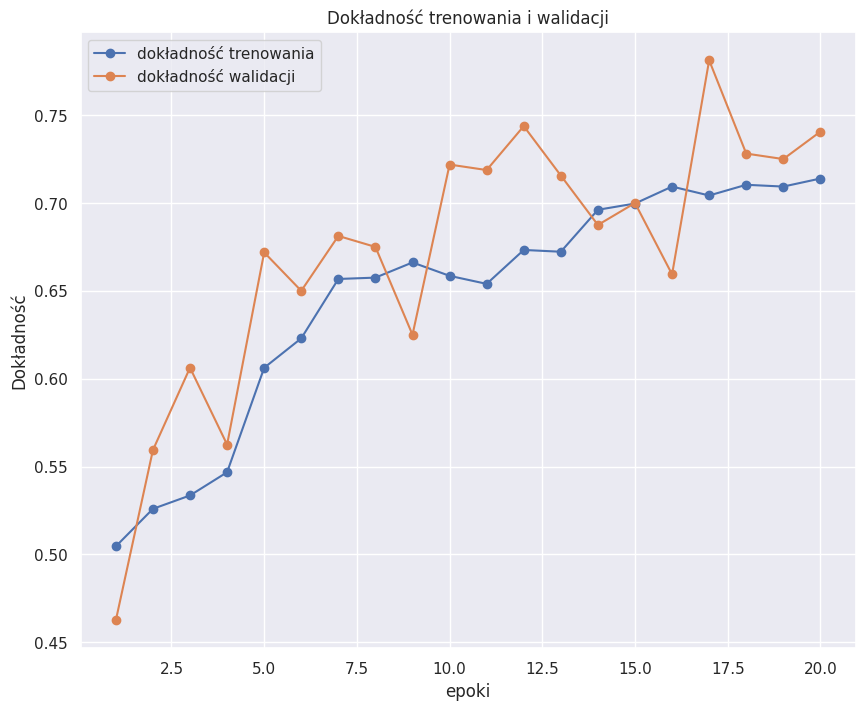

In [16]:
make_accuracy_plot(history)

In [17]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [18]:
index = 1642
img_path = '/content/cats_and_dogs/test/cats/cat.' + str(index) + '.jpg'

from tensorflow.keras.preprocessing import image
import numpy as np

#Przetwarzamy obraz tak aby uzyskał forę czterowymiarowego tensora
img = image.load_img(img_path, target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor /= 255.

print(img_tensor.shape)


(1, 150, 150, 3)


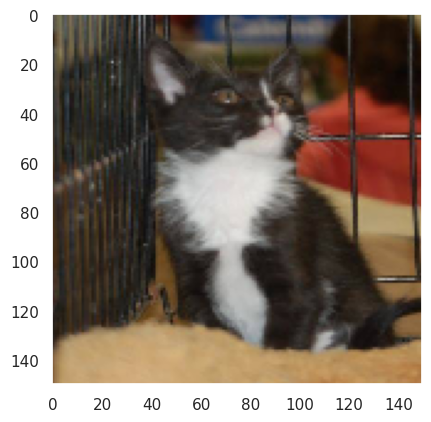

In [19]:
plt.imshow(img_tensor[0])
plt.grid(False)

In [20]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs = layer_outputs)
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
print(first_layer_activation.shape)

1/1 [==============================] - 0s 274ms/step
(1, 148, 148, 32)


#wyświetlenie map cech

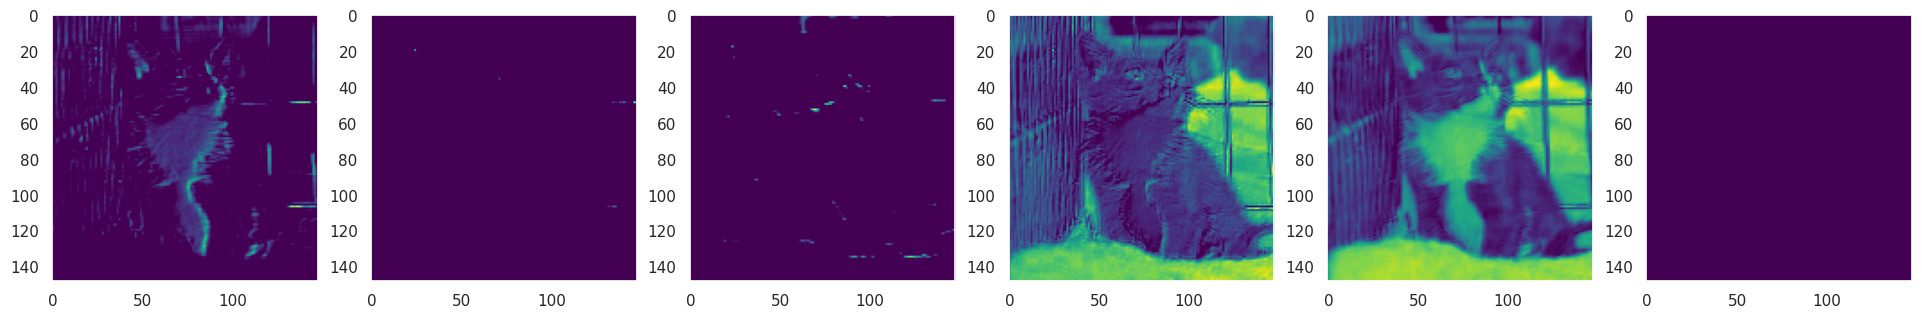

In [21]:

plt.figure(figsize=(24,24))

for i in range(1,7):
    plt.subplot(1,6,i)
    plt.imshow(first_layer_activation[0,:,:,i], cmap = 'viridis')
    plt.grid(False)

#Wizualizacja wszystkich kanałów każdej pośredniej warstwy aktywacji

Pierwsza warstwa wykrywa takie niskopoziomowe elementy jak krawędzie itd. Na tym etapie aktywacje zachowują prawie wszystkie informacje obecne w wejściowym obrazie. Nastęne warstwy stają się już coraz bardziej abstrakcyjne i trudniejsze w interpretacji graficznej. Pozwalają one kodować wysokopoziomowe cechy takie jak "kocie ucho", "kocie oko". Wyższe warstwy zawierają coraz mniej informacji dotyczących wizualnej zawartości obrazu  i jednocześnie zawierają coraz więcej informacji związanych z klasą obrazu


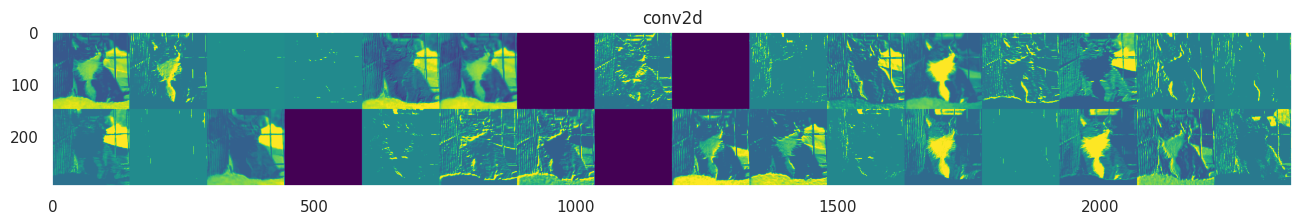

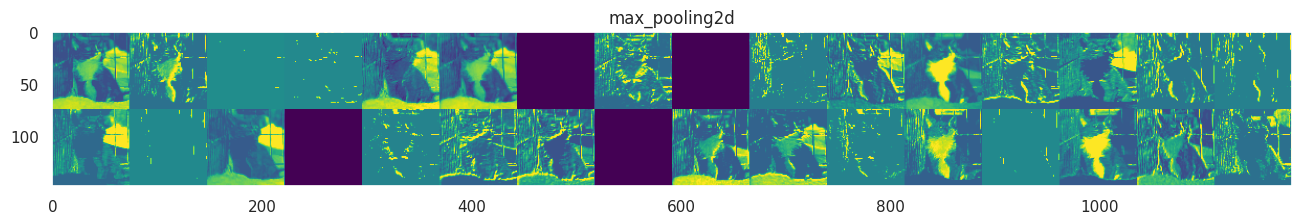

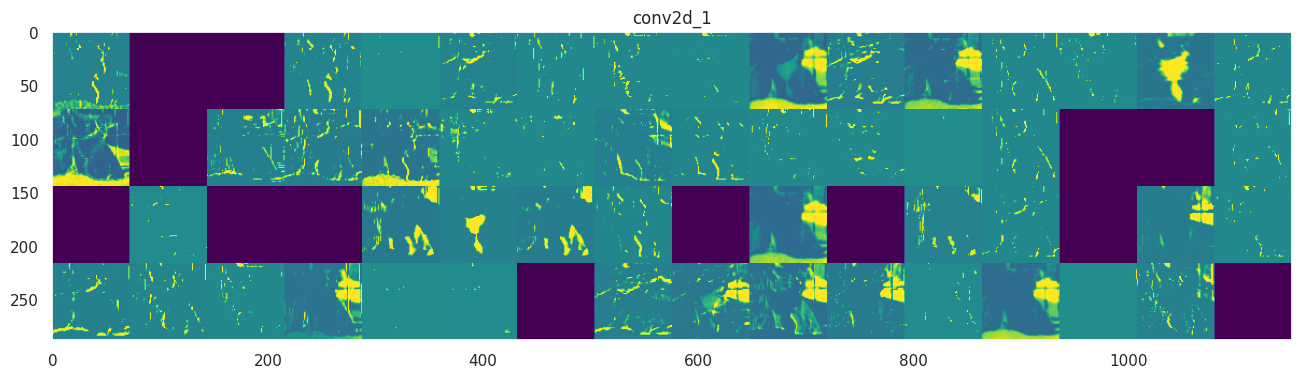

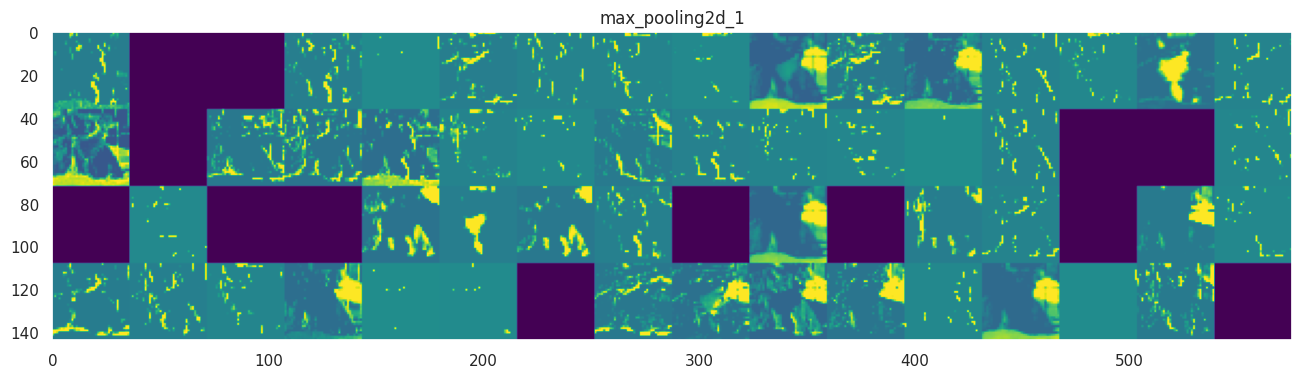

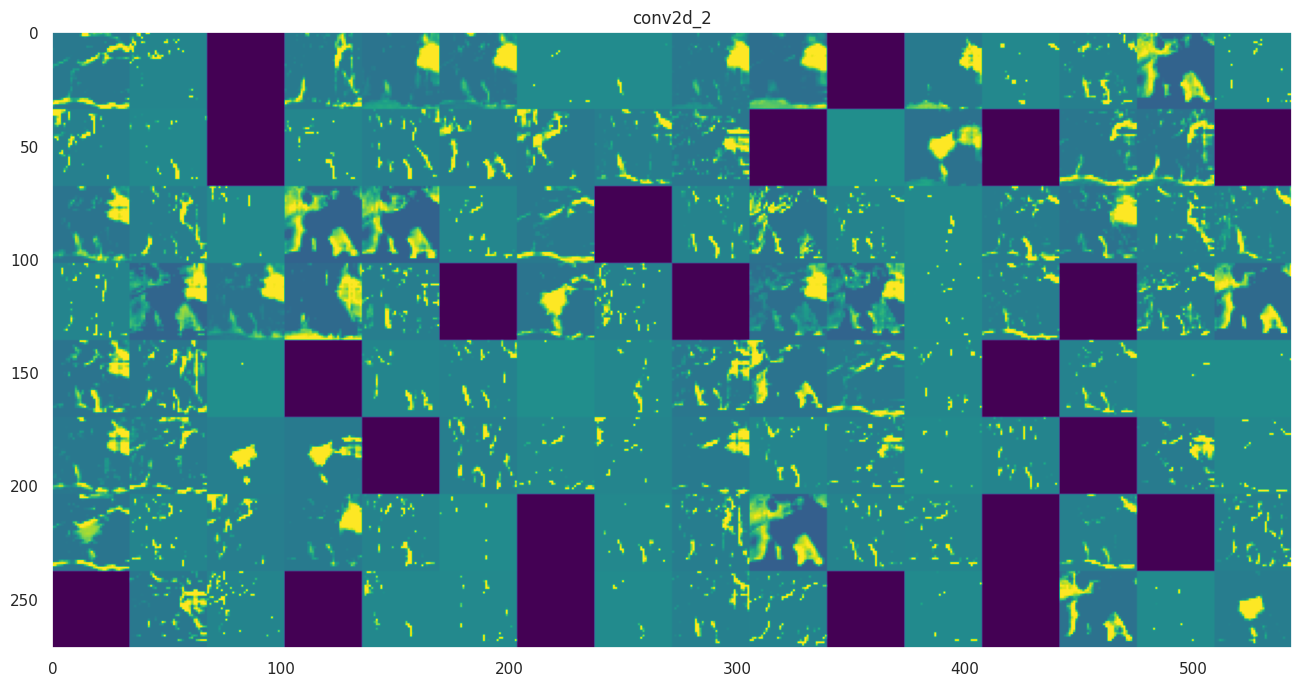

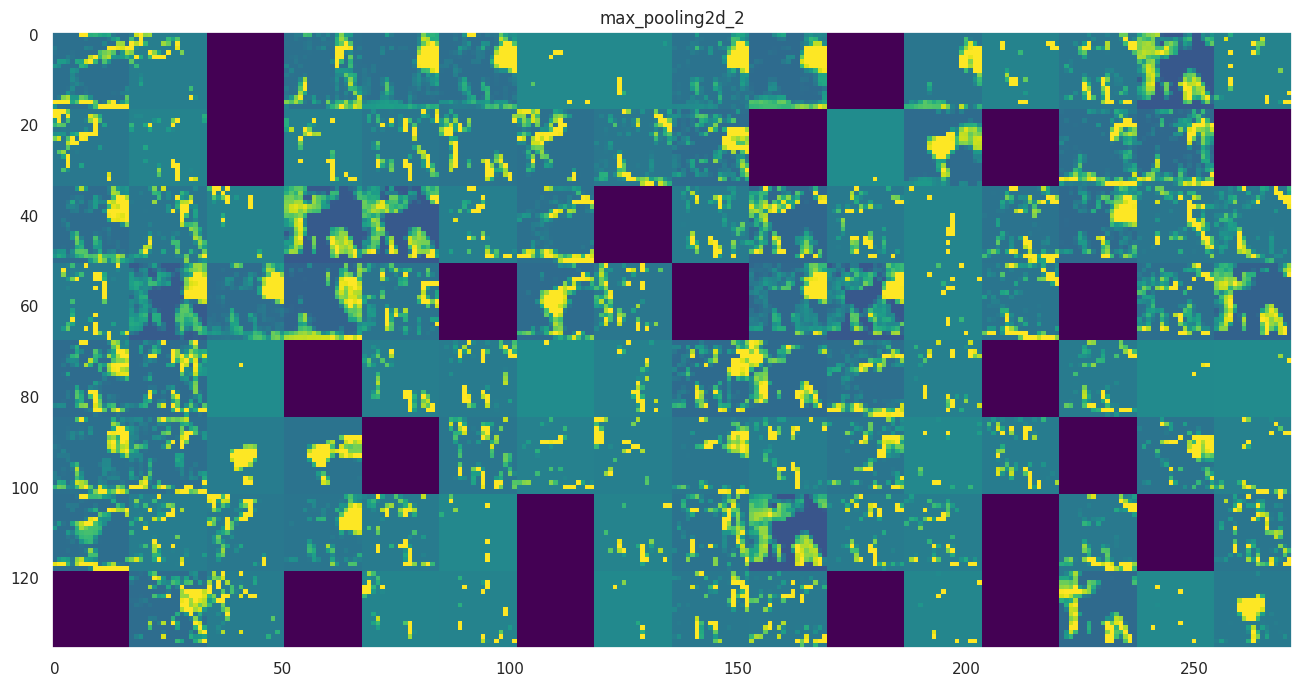

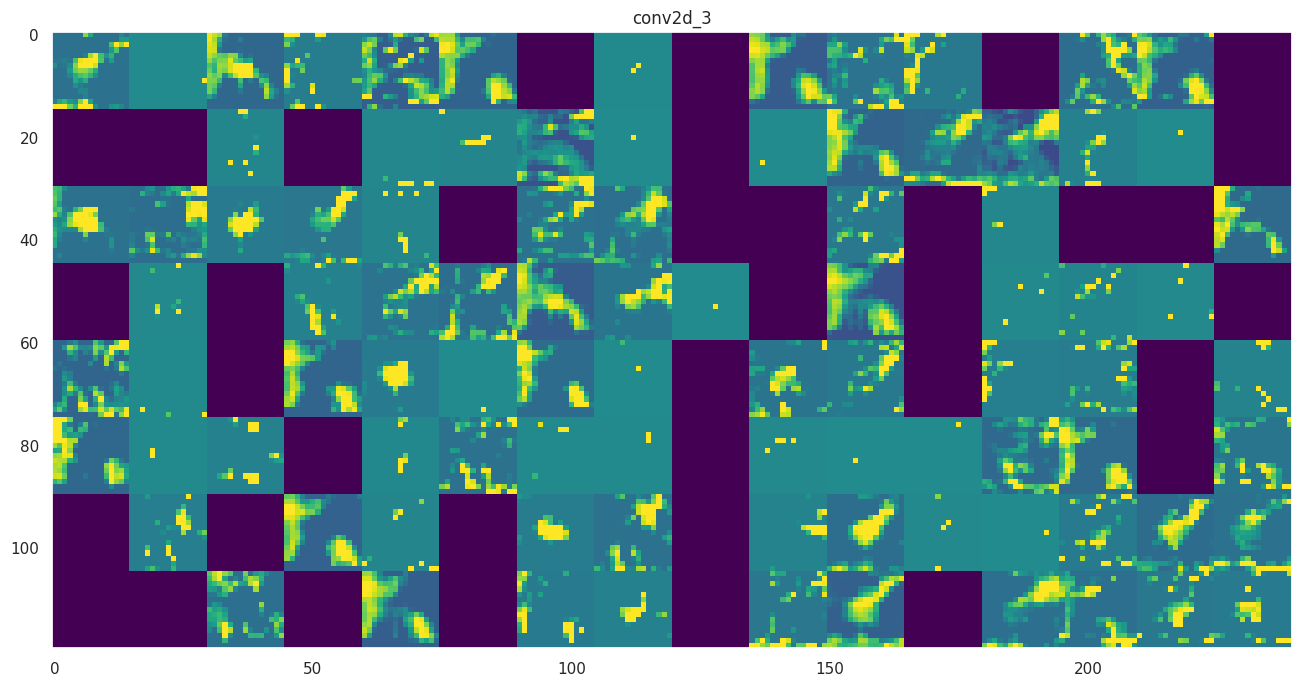

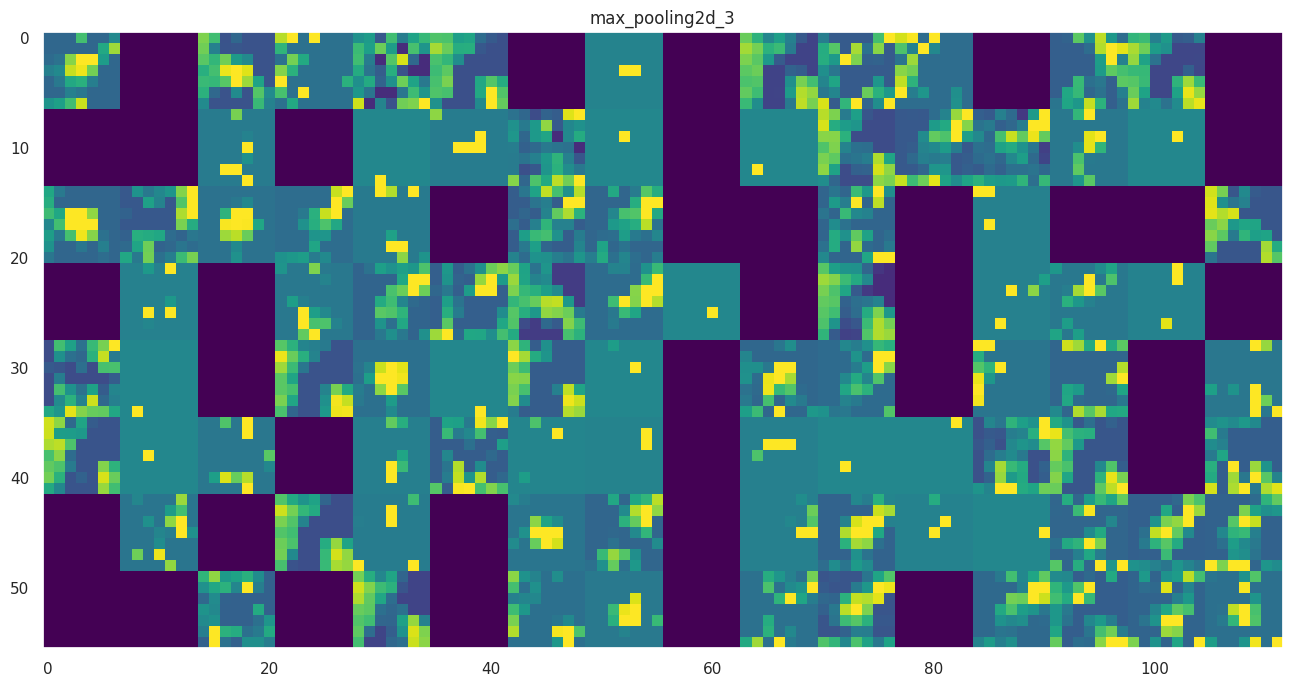

In [22]:
layer_names = [layer.name for layer in model.layers[:8]]

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]

    size = layer_activation.shape[1]

    n_cols = n_features // images_per_row

    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:,:,col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size: (col + 1) * size, row * size: (row+ + 1) * size] = channel_image

    scale = 1./size
    plt.figure(figsize=(scale *display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')

#Wizualizacja filtrów konwolucyjnych sieci neuronowych

Filtr konwolucyjny to inaczej graficzny wzorzec na który reaguje podany filtr


In [23]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
model = VGG16(weights='imagenet',
             include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

grads = K.gradients(loss, model.input)[0]
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

iterate = K.function([model.input], [loss,grads])

loss_value, grads_value = iterate([np.zeros((1, 150, 150 , 3))])

input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.

step = 1.

for i in range(40):
    loss_value, grads_value = iterate([input_img_data])

    input_img_data += grads_value * step

def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])

    grads = K.gradients(loss, model.input)[0]

    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    iterate = K.function([model.input], [loss, grads])

    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

    step = 1
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step

    img = input_img_data[0]
    return deprocess_image(img)

58889256/58889256 [==============================] - 0s 0us/step


In [24]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

#Wyświetlenie kilku przykłądowych filtrów


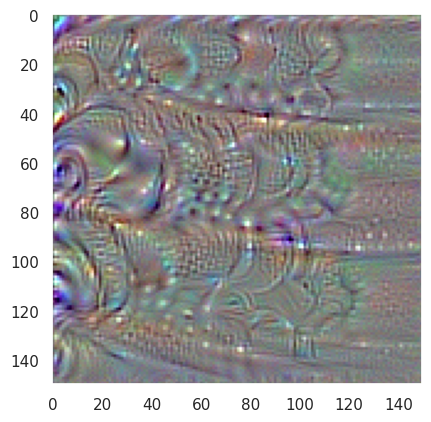

In [25]:
#@title Wybierz warstwę:
layer = 'block5_conv2' #@param ['block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']
plt.imshow(generate_pattern(layer, 1))
plt.grid(False)

#Wizualizacja map ciepła

Na koniec bardzo użyteczna technika wizualizacji. Jest niesłychanie pomocna w procesie debugowania modelu. Pozwala nam stwierdzić na podstawie której części obrazu model podjął taką a nie inną decyzję. Przydatna do eksploracji błędnie sklasyfikowanych obrazów.

W tym celu skorzystamy z implementacji opisanej w artykule Grad-CAM: Visual Explanations from Deep Networks via Gradient-based Localization.

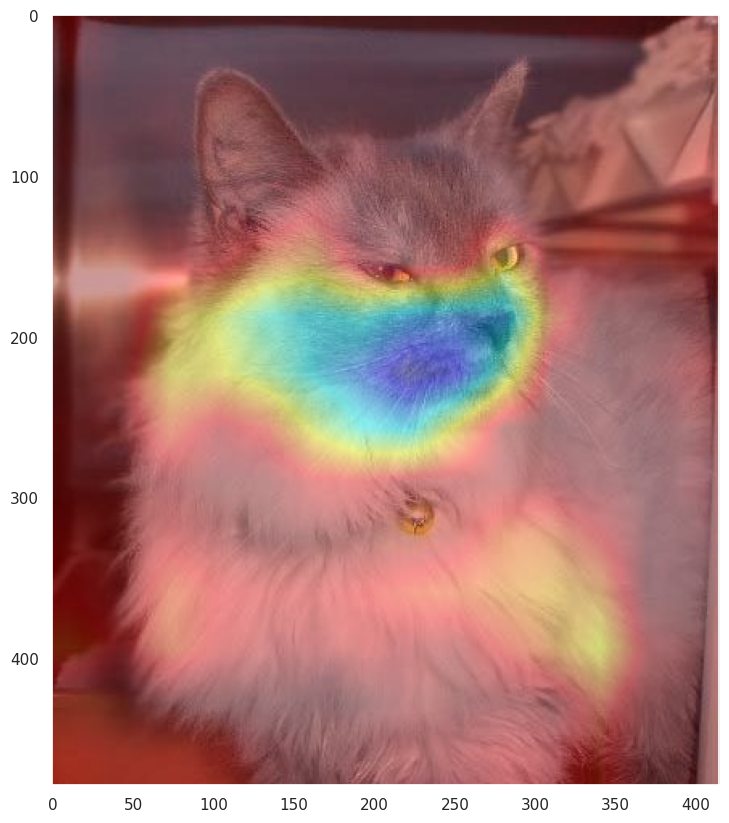

In [31]:
#@title Wybierz numer indeksu zdjęcia
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys

pets = 'cats' #@param ['cats', 'dogs']
index = 1588 #@param {'type': 'slider', min :1500, max: 1999}

model = VGG16(weights="imagenet")
img_path = '/content/cats_and_dogs/test/' + pets + '/' + pets[:3] + '.' + str(index) + '.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("block5_conv3")

grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.imshow(superimposed_img, cmap='viridis')
plt.grid(False)
plt.show()

Obszary zaznaczone na obrazie jako te 'bardziej niebieskie' miały silny wpływ na końcową predykcję modelu. Przykładowo, dla indeksu nr 1748 algorytm bardzo dokładnie wskazał, że przy podejmowaniu decyzji kierował się obszarem obrazu, w którym była zawarta głowa psa (w tym przypadku rasy Husky). Być może tym co pozwoliło zdecydować sieci o kategori obrazu były cechy takie jak kształt/kolor oczu czy kolor sierści wokół oczu.

Wnioski
Konwolucyjne sieci neuronowe są najlepszymi modelami uczenia maszynowego w zadaniach związanych z przetwarzaniem obrazu
Sieci konwolucyjne można trenować nawet na małych zbiorach danych, w tym celu pomocna okazuje się augmentacja danych i transfer learning (przykład: zdjęcia medyczne)
Możliwość stosowania transfer learningu pozwala trenować modele w znacznie krótszym czasie przy zdecydowanie większej skuteczności takiego modelu wobec modelu opartego tylko na danych, którymi dysponujemy
Techniki dostrajania pozwalają przystosować wyuczone wcześniej modele do naszego problemu, co w gruncie rzeczy powinno prowadzić do poprawy skuteczności pracy modelu
Jak głosi powszechne przekonanie o sieciach neuronowych jako o 'czarnych skrzynkach' to w przypadku sieci konwolucyjnych poszczególne etapy działania sieci są proste w wizualizacji.
Dzięki zastosowaniu różnych technik optymalizacji modelu (augmentacja danych, transfer learning) z bazowego modelu o poziomie dokładności ok. 73% udało się uzyskać model z dokładnością ok. 93% co jest bardzo zadawalającym wynikiem.

Projekt można potraktować jako szablon do zadań klasyfikacyjnych obrazu dla klasyfikacji binarnej. Jedyne co należy zmienić to dane wejściowe i niektóre nazwy ścieżek dostępu. Oczywiście, gdy nasze dane będą 'dość duże' można uruchomić klaster obliczeniowy w chmurze, w tym celu polecam narzędzie Amazon SageMaker lub AI Platform udostępniane przez Google Cloud Platform.